In [8]:
import json
import numpy as np
from matplotlib import pyplot as plt

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Duration error histogram between target mels and predicted mels

In [2]:
manifests={"test":"hifigan_test_ft.json", "train":"hifigan_train_ft.json", "val":"hifigan_val_ft.json"}

target_mels_path = "/github/datasets/openslr-95-german-neutral-tts/orig_synmels/"


In [17]:
def extract_duration(manifest_path):
    durations = []
    num_tokens_list = []
    with open(manifest_path, "r") as f:
        for i, line in enumerate(f):
            line_dict = json.loads(line)
            mel_path = line_dict['mel_filepath']
            mel = np.load(mel_path)
            durations.append(mel.shape[1])
            num_tokens = len(line_dict['normalized_text'].split(" "))
            num_tokens_list.append(num_tokens)
    return np.array(durations), np.array(num_tokens_list)

def generate_error_histogram(manifest_A, manifest_B, title="histogram of result"):
    print("manifest_A: "+manifest_A)
    print("manifest_B: "+manifest_B)
    durations_A, num_tokens_list_A = extract_duration(manifest_A)
    durations_B, num_tokens_list_B = extract_duration(manifest_B)
    print(durations_A.shape, durations_B.shape)
    print(num_tokens_list_A == num_tokens_list_B)
    error = durations_B - durations_A
    eval_metric = error/num_tokens_list_A
    print("Mean: ", str(np.mean(eval_metric)))
    print("Variance: ", str(np.var(eval_metric)))
    fig,ax = plt.subplots(1,1)
    ax.hist(error) #, bins = [0,25,50,75,100])
    ax.set_title(title)
#     ax.set_xticks([0,25,50,75,100])
    ax.set_xlabel('error')
    ax.set_ylabel('no. of samples')
    plt.figure(figsize=(16, 12), dpi=80)
    plt.show()

## Histogram A: For target mels and mels predicted by Fastpitch trained from scratch on German Dataset (R1) at 999 epochs

In [15]:
r1_synmels="/github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/"

Generating test set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_test_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_test_ft.json
(4535,) (4535,)
[ True  True  True ...  True  True  True]
Mean:  -1.5447082978139013
Variance:  33.88265587588787


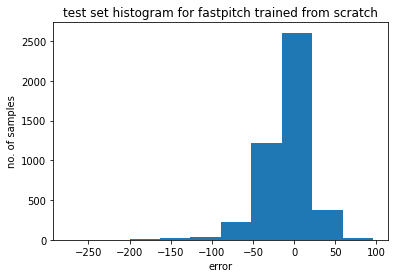

<Figure size 1280x960 with 0 Axes>

Generating train set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_train_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_train_ft.json
(15870,) (15870,)
[ True  True  True ...  True  True  True]
Mean:  -0.6533697977244265
Variance:  10.504538258007234


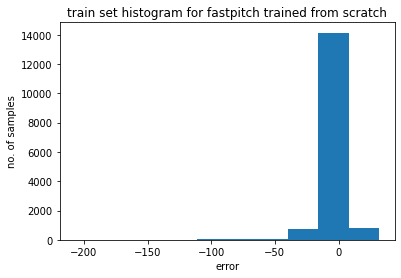

<Figure size 1280x960 with 0 Axes>

Generating val set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_val_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_val_ft.json
(2267,) (2267,)
[ True  True  True ...  True  True  True]
Mean:  -1.5276531014967258
Variance:  27.964136995770932


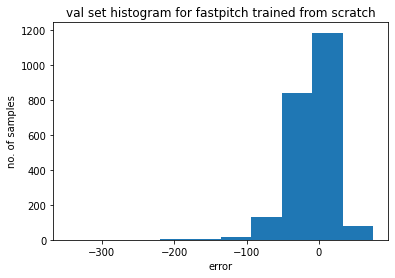

<Figure size 1280x960 with 0 Axes>

In [18]:
for key in manifests.keys():
    print("Generating "+key+" set histogram")
    generate_error_histogram(target_mels_path+manifests[key], r1_synmels+manifests[key], title=key+" set histogram for fastpitch trained from scratch")
    

## Histogram B: For target mels and mels predicted by Fastpitch_en finetuned on German Dataset (R3) at 149 epochs

In [6]:
r3_synmels="/github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/"

Generating test set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_test_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_test_ft.json
(4535,) (4535,)
[ True  True  True ...  True  True  True]
Mean:  -1.3804954313877358
Variance:  33.602159747136376


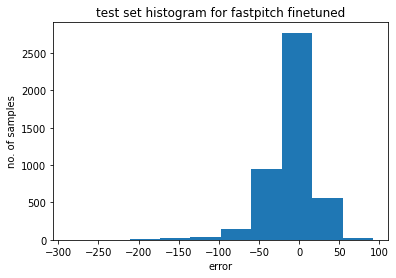

<Figure size 1280x960 with 0 Axes>

Generating train set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_train_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_train_ft.json
(15870,) (15870,)
[ True  True  True ...  True  True  True]
Mean:  -0.7634611602360629
Variance:  9.358414963603954


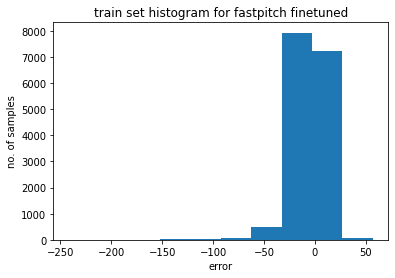

<Figure size 1280x960 with 0 Axes>

Generating val set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_val_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_val_ft.json
(2267,) (2267,)
[ True  True  True ...  True  True  True]
Mean:  -1.2876326767988413
Variance:  28.435903869948223


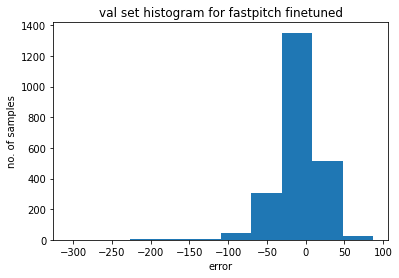

<Figure size 1280x960 with 0 Axes>

In [19]:
for key in manifests.keys():
    print("Generating "+key+" set histogram")
    generate_error_histogram(target_mels_path+manifests[key], r3_synmels+manifests[key], title=key+" set histogram for fastpitch finetuned")
    